# Analysis 4 of the Used Car Vehicles in Germany Available on eBay

In [1]:
%matplotlib inline

In [2]:
# importing required libraries
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")

In [6]:
# absolute path till parent folder
abs_path = os.getcwd()
path_array = abs_path.split("/")
path_array = path_array[:len(path_array)-1]
homefolder_path = ""
for i in path_array[1:]:
    homefolder_path = homefolder_path + "/" + i 

In [7]:
# path to clean data
clean_data_path = homefolder_path + "C:/Users/vincent/Documents/GitHub/Recent-Car-Changes-Dataset/CleanData/CleanedDataSet/cleaned_autos.csv"

# reading csv into raw dataframe
df = pd.read_csv(clean_data_path,encoding="latin-1")

In [9]:
trial = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["vehicleType"].unique()):
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["price"].mean()
        temp_df = pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0])
        trial = pd.concat([trial, temp_df])
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(5)

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


## Average price of a vehicle by brand as well as vehicle type 

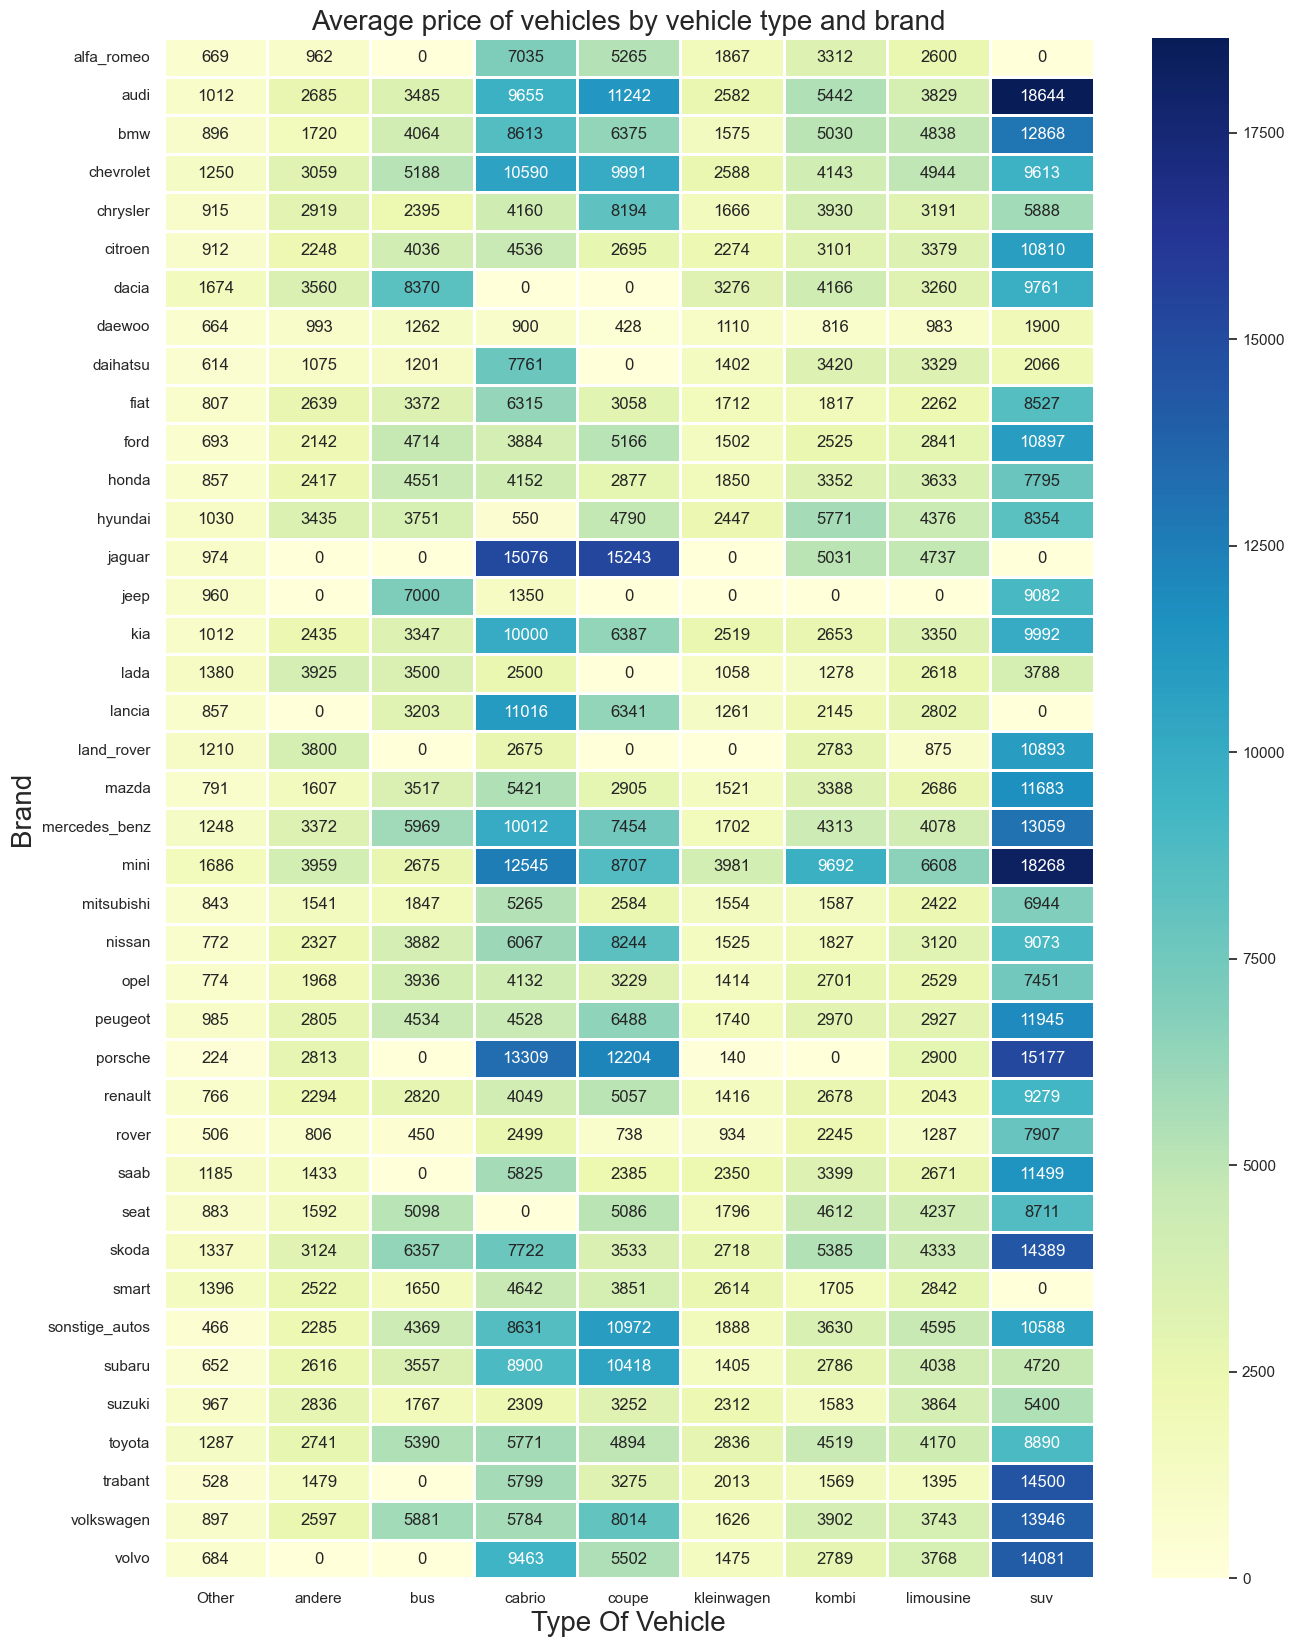

In [11]:
# HeatMap to show average prices of vehicles by brand and type together
tri = trial.pivot(index="brand", columns="vehicleType", values="avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri, linewidths=1, cmap="YlGnBu", annot=True, ax=ax, fmt="d")
ax.set_title("Average price of vehicles by vehicle type and brand", fontdict={'size':20})
ax.xaxis.set_label_text("Type Of Vehicle", fontdict= {'size':20})
ax.yaxis.set_label_text("Brand", fontdict= {'size':20})
plt.show()

In [14]:
fig.savefig((abs_path + "/Plots/heatmap-price-brand-vehicleType.png"))

In [18]:
df['gearbox'] = df['gearbox'].replace({'manuell': 'manual', 'automatik': 'automatic'})
df.head(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manual,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manual,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatic,163,...,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manual,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manual,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Offer,650,test,limousine,1995,manual,102,...,33775,2016-04-06 19:17:07,2016,2016,April,April,2,19,21,2
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Offer,2200,test,cabrio,2004,manual,109,...,67112,2016-04-05 18:18:39,2016,2016,April,April,4,18,12,4
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Offer,0,test,limousine,1980,manual,50,...,19348,2016-03-25 16:47:58,2016,2016,March,March,4,16,36,5
8,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Offer,999,test,kleinwagen,1998,manual,101,...,27472,2016-03-31 17:17:06,2016,2016,March,March,14,17,18,11
9,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Offer,2000,control,limousine,2004,manual,105,...,96224,2016-04-06 10:45:34,2016,2016,March,March,11,10,12,1
